In [1]:
import os 
import random
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from timeit import default_timer as timer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Activation,Flatten, Conv2D, MaxPool2D,Dropout

In [23]:
all_0="C:\\Users\\15879\\Desktop\\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia 2\\training_data\\fold_0\\all"
hem_0="C:\\Users\\15879\\Desktop\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia 2\\training_data\\fold_0\\hem"
all_1="C:\\Users\\15879\\Desktop\\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia 2\\training_data\\fold_1\\all"
hem_1="C:\\Users\\15879\\Desktop\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia 2\\training_data\\fold_1\\hem"
all_2="C:\\Users\\15879\\Desktop\\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia 2\\training_data\\fold_2\\all"
hem_2="C:\\Users\\15879\\Desktop\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia 2\\training_data\\fold_2\\hem"
val = "C:\\Users\\15879\\Desktop\\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia 3\\validation_data\\C-NMC_test_prelim_phase_data"
df_val = pd.read_csv('C-NMC_test_prelim_phase_data_labels.csv')

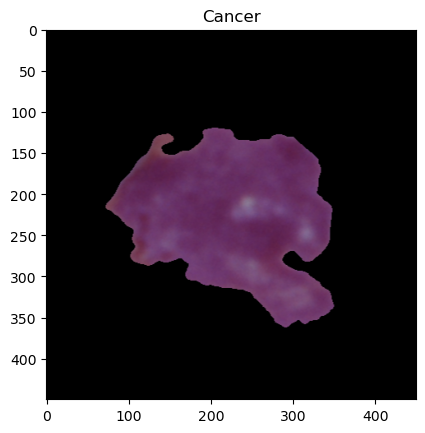

In [24]:
a_image_fnames = os.listdir(all_0)
cancer_img = cv2.imread(os.path.join(all_0,a_image_fnames[5]))
plt.imshow(cancer_img)
plt.title('Cancer')
plt.show()

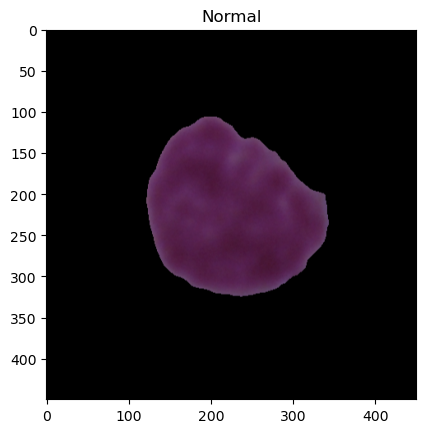

In [25]:
h_image_fnames = os.listdir(hem_0)
h_img = cv2.imread(os.path.join(hem_0,h_image_fnames[5]))
plt.imshow(h_img)
plt.title('Normal')
plt.show()

In [26]:
h_img.shape

(450, 450, 3)

In [27]:
def get_path_image(folder):
    image_paths = []
    if os.path.exists(folder):
        image_fnames = os.listdir(folder)
        for img_id in range(len(image_fnames)):
            img = os.path.join(folder,image_fnames[img_id])
            image_paths.append(img)  
    else:
        print("error folder not found", folder )
    return image_paths  

In [28]:
cancer_list = []

for i in [all_0,all_1,all_2]:
    paths = get_path_image(i)
    cancer_list.extend(paths)
print('Number of cancer images:', len(cancer_list))

normal_list = []
for i in [hem_0,hem_1,hem_2]:
    paths = get_path_image(i)
    normal_list.extend(paths)
print('Number of normal images:', len(normal_list))    

Number of cancer images: 7272
Number of normal images: 3389


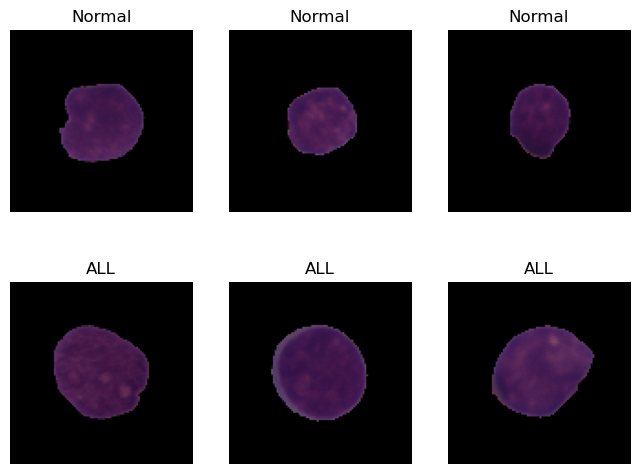

In [29]:
select_normal = np.random.choice(normal_list, 3, replace = False)
select_all = np.random.choice(cancer_list, 3, replace = False)


fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = select_normal[i]
        label = 'Normal'
    else:
        fp = select_all[i-3]
        label = 'ALL'
    ax = fig.add_subplot(2, 3, i+1)                                  
    fn = image.load_img(fp, target_size = (100,100),
                        color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')    
    plt.title(label)
    plt.axis('off')
plt.show()

In [31]:
test = "C:\\Users\\15879\\Desktop\\BMEN 415\\BMEN 415 Final Project\\C-NMC_Leukemia\\testing_data\\C-NMC_test_final_phase_data"
validation_list = get_path_image(val)
test_list = get_path_image(test)

In [32]:
X_train, y_train, X_val, y_val, X_test = [], [], [], [], []

for i in (cancer_list):
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))  
    X_train.append(img)
    y_train.append(1)
for i in (normal_list):
    iimg = cv2.imread(i)
    img = cv2.resize(img, (224, 224))  
    X_train.append(img)
    y_train.append(0)

for i in validation_list:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))  
    X_val.append(img) 
y_val = df_val["labels"].values

for i in test_list:
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))  
    X_test.append(img)

In [33]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)

In [34]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)

(10661, 224, 224, 3)
(10661,)
(1867, 224, 224, 3)
(1867,)
(2586, 224, 224, 3)


In [35]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25)) 

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25)) 

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.5)) 
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 111, 111, 16)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 32)       

In [36]:
start = timer()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=1000, epochs=7, 
                    validation_data=(X_val, y_val))
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/7
11/11 [==============================] - 122s 11s/step - loss: 11.2789 - accuracy: 0.5793 - val_loss: 0.9303 - val_accuracy: 0.6529
Epoch 2/7
11/11 [==============================] - 106s 10s/step - loss: 0.6921 - accuracy: 0.6821 - val_loss: 0.9328 - val_accuracy: 0.6529
Epoch 3/7
11/11 [==============================] - 114s 11s/step - loss: 0.6905 - accuracy: 0.6821 - val_loss: 0.9544 - val_accuracy: 0.6529
Epoch 4/7
11/11 [==============================] - 118s 11s/step - loss: 0.6886 - accuracy: 0.6821 - val_loss: 0.9629 - val_accuracy: 0.6529
Epoch 5/7
11/11 [==============================] - 124s 11s/step - loss: 0.6868 - accuracy: 0.6821 - val_loss: 0.9651 - val_accuracy: 0.6529
Epoch 6/7
11/11 [==============================] - 99s 9s/step - loss: 0.6850 - accuracy: 0.6821 - val_loss: 0.9650 - val_accuracy: 0.6529
Epoch 7/7
11/11 [==============================] - 127s 12s/step - loss: 0.6832 - accuracy: 0.6821 - val_loss: 0.9642 - val_accuracy: 0.6529
Total Time Ela

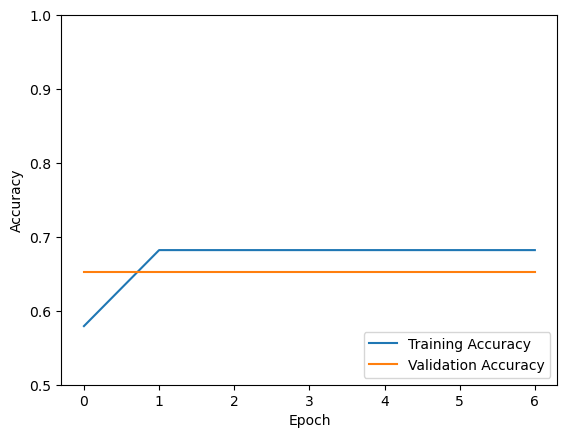

In [37]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [39]:
model.evaluate(X_val, y_val)

59/59 [==============================] - 4s 60ms/step - loss: 0.9642 - accuracy: 0.6529


[0.9641894102096558, 0.6529191136360168]